In [39]:
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [40]:
series_path = 'data/input/subject_timeseries/'

In [41]:
files = np.sort(os.listdir(series_path))
print(f'Files: {len(files)}')
files[0]
paths = [series_path + file for file in files]

Files: 50


In [42]:
paths[:5]

['data/input/subject_timeseries/n001.npy',
 'data/input/subject_timeseries/n002.npy',
 'data/input/subject_timeseries/n003.npy',
 'data/input/subject_timeseries/n004.npy',
 'data/input/subject_timeseries/n005.npy']

In [46]:
series = []
subject_id = []
for file in paths:
    name = file.split('/')[-1][:4]
    subject_id.append(name)
    data = np.load(file)
    series.append(data)
print(f'allSeries: {len(series)}')
print(f'Series shape: {data.shape}')

allSeries: 50
Series shape: (332, 610)


In [47]:
name 

'n050'

In [48]:
FCs = []
t = 1
for s in series:
    corr = np.corrcoef(s)
    FCs.append(corr)
    t += 1
print('all FCs: ', len(FCs), FCs[0].shape)

all FCs:  50 (332, 332)


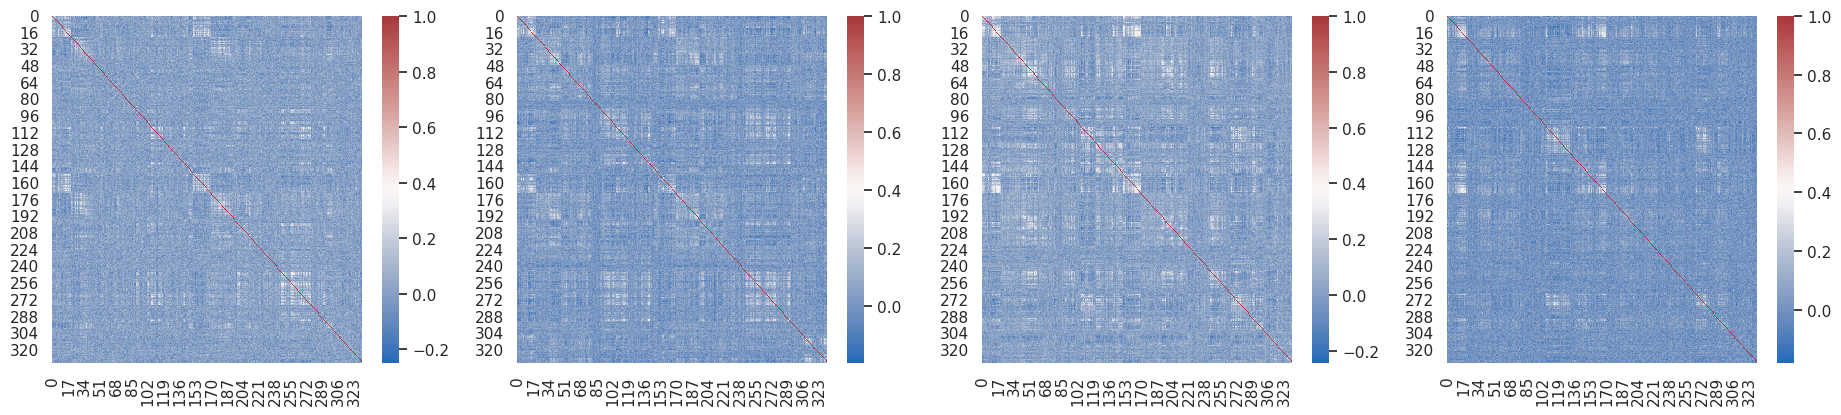

In [49]:
fig = plt.figure(figsize=(23,4.5))

for i, m in enumerate(FCs[:4]):
    axes = fig.add_subplot(1, 4, i+1)
    sns.heatmap(m, cmap='vlag')

## Vectorization

In [50]:
from utils.brain import upper_vectorization

In [51]:
vectors = []
for m in FCs:
    m_vec = upper_vectorization(m)
    vectors.append(m_vec)
    
vectors = np.array(vectors)
print(f'All vecs: {vectors.shape}')

All vecs: (50, 54946)


In [52]:
stackedVecs = np.array(vectors)
stackedVecs.shape

(50, 54946)

In [53]:
np.save('data/output/subject_brain_vectors', stackedVecs)